# **Import (Run)**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
import PIL
import random
import sklearn
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cols
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage,AnnotationBbox

import requests
from PIL import Image
from io import BytesIO

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, GlobalAvgPool2D, Add, Dropout

# **Loading dei file** (Run)
RGB images from this [kaggle dataset](https://www.kaggle.com/datasets/somesh24/multiclass-images-for-weather-classification?select=dataset2) were resized and saved as (224,224,3) vectors.

In [ ]:
X = np.load("/content/drive/MyDrive/Colab Notebooks/Weather-Arrays/imgs.npy")
y = np.load("/content/drive/MyDrive/Colab Notebooks/Weather-Arrays/labels.npy")
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Weather-Arrays/final_comp_relurelu.h5")

In [ ]:
def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]
class_directory = {"Cloudy": 0, "Rain": 1, "Shine": 2, "Sunrise": 3}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
predictions = model.predict(X_test)

In [ ]:
def comparison(model):
    score = model.evaluate(X_test, y_test,verbose=1)
    print("Test Accuracy:" +  str(score[1]))

    from sklearn.metrics import confusion_matrix

    #Predict
    y_prediction = model.predict(X_test)
    y_classes = y_prediction.argmax(axis=-1)

    #Create confusion matrix and normalizes it over predicted (columns)
    result = confusion_matrix(y_test, y_classes , normalize='pred')
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt
    class_directory = {"Cloudy": 0, "Rain": 1, "Shine": 2, "Sunrise": 3}
    sns.heatmap(result, annot= True, linewidths=.5, cmap = "coolwarm", xticklabels = list(class_directory.keys()), yticklabels = list(class_directory.keys()))
    plt.show()
#comparison(model)

In [ ]:
ind = random.randint(0,len(X_test))

#for key in class_directory.keys():
#   print(key + "   " + str(round(predictions[ind][class_directory[key]],5)))
#print("\nTrue Label = " + get_keys_from_value(class_directory, y_test[ind])[0])
#plt.imshow(X_test[ind]/255.)
#plt.show()

# **Classification**

In [ ]:
import random
import cv2 as cv
import numpy as np
import pandas as pd
from tabulate import tabulate
from ipywidgets import interactive
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

In [ ]:
def probs_plotter(ind):
    
    #ind = random.randint(0,len(X_test))
    fig, ax = plt.subplots(figsize=(27, 9))
    ax.imshow(X_test[ind]/255.)
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/CloudyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea("Prob Cloud", textprops = {'fontsize': 'xx-large'})

    # Clouds
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/CloudyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[ind][class_directory["Cloudy"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 30), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 30),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)

    #  Rain
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/RainyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[ind][class_directory["Rain"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 80), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 80),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)

    # Shine
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/SunnyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[ind][class_directory["Shine"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 130), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 130),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)

    # Sunrise
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/SunriseIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[ind][class_directory["Sunrise"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 180), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 180),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)


    ax.set_xlim([0,448])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    

In [ ]:
def probs_plotter_outer(path = "", url = "",method = 'url'):
    if method == 'path' and path != "":
        testing = load_img(path, color_mode = "rgb")
    else:
        response = requests.get(url)
        testing = Image.open(BytesIO(response.content))
    testing= img_to_array(testing)
    testing = cv.resize(testing, (224,224),interpolation=cv.INTER_AREA)
    #print(np.array([testing,testing]).shape)
    predictions = model.predict(np.array([testing,testing]))
    #print(predictions)

    fig, ax = plt.subplots(figsize=(27, 9))
    ax.imshow(testing/255.)
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/CloudyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea("Prob Cloud", textprops = {'fontsize': 'xx-large'})

    # Clouds
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/CloudyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[0][class_directory["Cloudy"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 30), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 30),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)

    #  Rain
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/RainyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[0][class_directory["Rain"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 80), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 80),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)

    # Shine
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/SunnyIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[0][class_directory["Shine"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 130), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 130),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)

    # Sunrise
    img = load_img("/content/drive/MyDrive/Colab Notebooks/WeatherIcons/SunriseIcon.png", color_mode = "rgba")
    img = img_to_array(img)
    img = cv.resize(img, (224,224),interpolation=cv.INTER_AREA)
    imagebox = OffsetImage(img/255., zoom=0.5)
    imagebox.image.axes = ax
    offsetbox = TextArea(str(round(predictions[0][class_directory["Sunrise"]],5)), textprops = {'fontsize': 'xx-large'})
    ab = AnnotationBbox(offsetbox, (370, 180), frameon = False)
    ax.add_artist(ab)
    ab = AnnotationBbox(imagebox, (270, 180),
          #xycoords='data',
          #xybox = (35000,-20000),
          #boxcoords="offset points",
          #pad=0.0,
          frameon = False,
          arrowprops=dict(
              arrowstyle="->",
              connectionstyle="angle,angleA=0,angleB=90,rad=3")
          )
    ax.add_artist(ab)


    ax.set_xlim([0,448])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [ ]:
%matplotlib inline
indxs = IntSlider(value=19, min=0, max= len(X_test)-1, step=1, description='Image index')
int_plot = interactive(probs_plotter, ind = indxs)
output = int_plot.children[-1]                    
output.layout.height = '550px'
int_plot

interactive(children=(IntSlider(value=19, description='Image index', max=279), Output(layout=Layout(height='55…

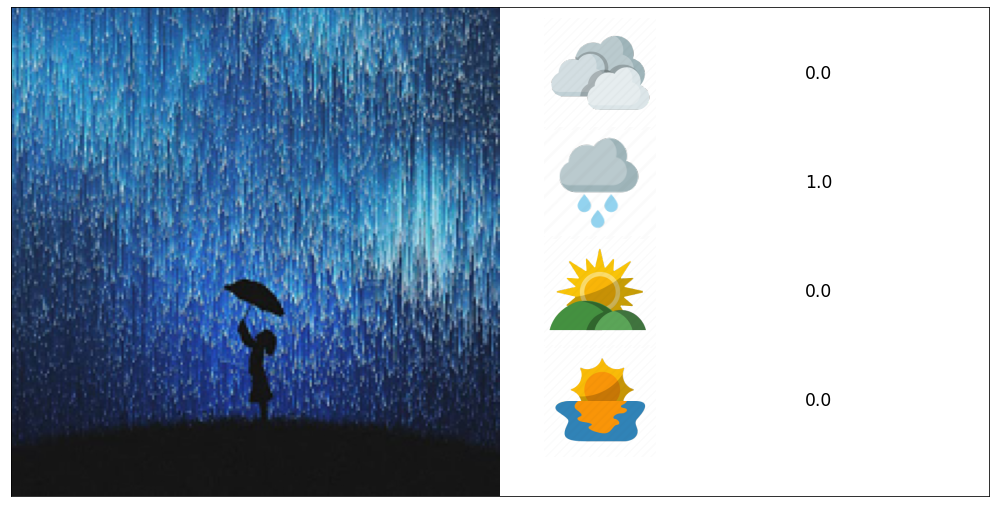

In [ ]:
#probs_plotter_outer(url = "https://torange.biz/photofxnew/180/IMAGE/black-white-cloudy-sky-180837.jpg", method = 'url')
#probs_plotter_outer(url = "https://thumbs.dreamstime.com/b/sky-colorful-clouds-above-atlantic-ocean-sunset-landscape-background-space-ror-your-own-text-tenerife-canary-islands-169519920.jpg", method = 'url')
#probs_plotter_outer(url = "https://www.adorama.com/alc/wp-content/uploads/2017/11/shutterstock_114802408.jpg",method = 'url')
#probs_plotter_outer(url = 'https://cdn.hswstatic.com/gif/why-is-sky-blue.jpg',method = 'url')
#probs_plotter_outer(url = 'https://cdn.pixabay.com/photo/2018/08/23/07/35/thunderstorm-3625405__340.jpg',method = 'url')
probs_plotter_outer(url = 'https://m.media-amazon.com/images/I/A1if32eJ25L._SS500_.jpg',method = 'url')


In [ ]:
#probs_plotter_outer(path = '/content/photo_2022-08-31_18-48-40.jpg', method = 'path')

# **Fuzzy**

In [ ]:
from sklearn.model_selection import train_test_split
X = np.load("/content/drive/MyDrive/Colab Notebooks/Weather-Arrays/imgs.npy")
y = np.load("/content/drive/MyDrive/Colab Notebooks/Weather-Arrays/labels.npy")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state= 69)
X, y = X_train, y_train

In [ ]:
#appiattire i vettori 3D in 1D e quindi X sarà 750 x 150528(224x224x3)
X_flatten=[]
for i in X:
  X_flatten = np.append(X_flatten,i.flatten())

print(X_flatten.shape)

X_flatten=np.array(X_flatten)
X_flatten=X_flatten.reshape(len(X),150528)

print(X_flatten.shape)

(151732224,)
(1008, 150528)


In [ ]:
#Import required modules
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 0.9 , svd_solver = 'full')
converted_data = pca.fit_transform(X_flatten)
 
converted_data.shape

(1008, 76)

In [ ]:
!pip install fuzzy-c-means
import numpy as np
import seaborn as sns
from fcmeans import FCM
import matplotlib.colors as cols


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
def cluster_comparison(n_clust, alphas = False):

    my_model = FCM(n_clusters= n_clust) 
    my_model.fit(converted_data) ## X, numpy array. rows:samples columns:features

    centers = my_model.centers
    labels = my_model.predict(converted_data)
    
    softs = my_model.soft_predict(converted_data)
    max_softs = []
    for i in range(len(softs)):
        max_softs = softs[:,labels[i]]

    # Visualizziamo lo scatterplot per prima e seconda principal component
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize = (10,6))
    c_map = plt.cm.get_cmap('jet', len(np.unique(labels)))
    
    
    if alphas == True:
      for i in range(len(converted_data)):
            plt.scatter(converted_data[i, 0], converted_data[i, 1], s = 39,
                cmap = c_map , c = 'Black', alpha = max_softs[i]**2)
      #plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 39,
      #      cmap = c_map , c = labels, alpha = alpha)
    else:
      plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 39,
                  cmap = c_map , c = labels, alpha = 0.3)
    
    if alphas == True:
      for i in range(len(converted_data)):
            plt.scatter(converted_data[i, 0], converted_data[i, 1], s = 39,
                cmap = c_map , c = 'Black', alpha = max_softs[i]**2)

    plt.colorbar(plt.cm.ScalarMappable(norm =cols.Normalize(0,len(np.unique(labels))),cmap = c_map))
    plt.xlabel('PC-1') , plt.ylabel('PC-2')
    plt.title("Fuzzy clusters found")
    plt.show()
    
    '''
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize = (10,6))
    c_map = plt.cm.get_cmap('jet', 4)
    plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 39,
                cmap = c_map , c = y, alpha = 0.3)
    plt.colorbar(plt.cm.ScalarMappable(norm =cols.Normalize(0,4),cmap = c_map))
    plt.xlabel('PC-1') , plt.ylabel('PC-2')
    plt.title("Real clusters")
    plt.show()
    plt.close()
    '''

In [ ]:
indxs = IntSlider(value=5, min=2, max= 15, step=1, description='Number of clusters')
int_plot = interactive(cluster_comparison, n_clust = indxs)
output = int_plot.children[-1]                    
output.layout.height = '550px'
int_plot

interactive(children=(IntSlider(value=5, description='Number of clusters', max=15, min=2), Checkbox(value=Fals…

In [ ]:
##### Display
def image_scatter_display(index, p = 5, z1 = 3, z2 =1):
      import matplotlib.colors as cols
      from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage,AnnotationBbox

      #plt.figure(figsize = (10,6))
      fig, ax = plt.subplots(figsize=(21, 13))

      imagebox = OffsetImage(X[index]/255., zoom=z1/10)
      imagebox.image.axes = ax

      ab = AnnotationBbox(imagebox, (converted_data[index, 0], converted_data[index, 1]),
                          xycoords='data',
                          xybox = (35000,-20000),
                          #boxcoords="offset points",
                          pad=0.1,
                          arrowprops=dict(
                              arrowstyle="->",
                              connectionstyle="angle,angleA=0,angleB=90,rad=3")
                          )
      
      abs = []
      for i in range(len(X)):
        if random.random() < p/100:
          imagebox_n = OffsetImage(X[i]/255., zoom=z2/10)
          imagebox_n.image.axes = ax

          ab_n = AnnotationBbox(imagebox_n, (converted_data[i, 0], converted_data[i, 1]), xycoords='data', pad=0.0)
          abs.append(ab_n)
      #plt.style.use('seaborn-whitegrid')

      c_map = plt.cm.get_cmap('Set1', len(np.unique(labels)))
      ax.scatter(converted_data[:, 0], converted_data[:, 1], s = 69,
                  cmap = c_map, c = labels, alpha = 0.3)
      ax.scatter(converted_data[index, 0], converted_data[index, 1], s = 69,
                   c = "Navy")

      #plt.colorbar(plt.cm.ScalarMappable(norm =cols.Normalize(0,len(np.unique(labels))),cmap = c_map))
      ax.set_xlabel('PC-1') , plt.ylabel('PC-2')
      ax.set_title("Fuzzy clusters found")
      ax.add_artist(ab)
      for a in abs:
        ax.add_artist(a)
      plt.show()

In [ ]:
import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters= 5) 
my_model.fit(converted_data) ## X, numpy array. rows:samples columns:features

centers = my_model.centers
labels = my_model.predict(converted_data)

In [ ]:
%matplotlib inline
indxs = IntSlider(value=19, min=0, max= len(X), step=1, description='Image index')
probs = IntSlider(value=5, min=0.00, max= 100, step=1, description='Display Rate')
z1s   = IntSlider(value=3, min=0, max= 10, step=1, description='Zoom 1')
z2s   = IntSlider(value=1, min=0, max= 10, step=1, description='Zoom 2')

int_plot = interactive(image_scatter_display, index = indxs, p = probs, z1 = z1s, z2 = z2s)

output = int_plot.children[-1]                    
output.layout.height = '1050px'
int_plot

interactive(children=(IntSlider(value=19, description='Image index', max=1008), IntSlider(value=5, description…